# Trends and Patterns: A Comprehensive Analysis of Average Property Prices

## Table of Contents

1. Introduction
2. Section 1: Data Preprocessing
   - Segregation of Data
   - Augmentation of Region Information
   - Handling Missing Values
   - Summary
3. Section 2: Trends
   - Plotting Trends
   - Comparative Analysis
   - Insightful Commentary
   - Summary
4. Section 3: Dynamics of Flat Price Variations
   - Quantify Price Changes
   - Visualise Regional Trends
   - Identify Patterns
   - Summary 
5. Section 4: Statistical Analysis
   - Cross-tabulate Price Changes by Region
   - Chi-Square Test for Regional Differences
   - Interpretation of Results
6. Conclusion

## Introduction

The real estate market is a dynamic landscape influenced by various factors, and understanding the trends in property prices is crucial for informed decision-making. In this report, we delve into a comprehensive analysis of average property prices across different regions to uncover patterns and insights that can shed light on the market dynamics.

### Context

As the housing market plays a pivotal role in the economic landscape, comprehending the nuances of property price fluctuations becomes increasingly essential. This analysis focuses on a dataset spanning 36 months, exploring the average prices of different property types in various regions. By examining trends, we identify patterns that can contribute to a deeper understanding of the factors influencing property prices.

### Report Structure

The report is structured into distinct sections, each addressing specific aspects of the analysis. We start by loading and preparing the data and then by exploring trends in property prices. Subsequently, we delve into the changes in flat prices and conclude with a statistical analysis to ascertain regional variations.

Let us embark on this analytical journey to unravel the trends and patterns shaping the ever-evolving landscape of average property prices.


**Note:** Code explanations have been meticulously incorporated to enhance clarity where deemed necessary. Certain code blocks may diverge from additional explanations when the procedural steps have been comprehensively explained. Readers are encouraged to skip over these sections if further elaboration is deemed unnecessary. 

## Section 1: Data Preprocessing

The foundation of any meaningful analysis lies in the careful preparation of data. In this section, we embark on the crucial task of preprocessing the property price data to create a well-structured foundation for subsequent analysis. The dataset encompasses various property types associated with specific regions and areas.

### Dataset Overview

Before diving into the preprocessing intricacies, let us briefly explore the dataset. It comprises information about the average prices of various property types over 36 months. The properties are categorised into regions and areas, with 'E12' prefixes denoting regions and other prefixes representing specific areas.

### Objectives

Our primary objectives in this section are threefold:

1. **Segregation of Data:**
   - Distinguish between region and area data, laying the groundwork for in-depth exploration.
   
2. **Augmentation of Region Information:**
   - Utilise the 'location code' dataset to enrich each area's property price record with its respective region information, ensuring a comprehensive assignment.

3. **Handling Missing Values:**
   - Conduct a meticulous assessment of missing region or area data values, implementing strategic decisions to maintain data integrity.

The subsequent sections will outline the step-by-step process involved in achieving these objectives. By the end of this data preprocessing phase, we aim to have a clean, well-organised dataset ready for a detailed and reliable analysis.

### Section 1.1 Segregation of Data

In [1]:
# Import the pandas library for data manipulation
import pandas as pd

# Read the property price dataset and location code dataset
property_data = pd.read_csv('average-property-price.csv')
location_data = pd.read_csv('location-codes.csv')

# Separate region data (with 'E12' prefix codes) from area data (other prefixes)
region_data = property_data[property_data['Code'].str.startswith('E12')]
area_data = property_data[~property_data['Code'].str.startswith('E12')]

# Display the first few rows of the newly created datasets for verification
print("Region Data:")
print(region_data.head())

print("\nArea Data:")
print(area_data.head())

Region Data:
            Date        Area       Code     Detached         Semi  \
5436  01/09/2016  North East  E12000001  208117.1739  125683.3380   
5437  01/10/2016  North East  E12000001  208519.1158  125464.3201   
5438  01/11/2016  North East  E12000001  210555.4948  126082.1090   
5439  01/12/2016  North East  E12000001  211728.7243  127186.0647   
5440  01/01/2017  North East  E12000001  205942.7099  123088.4533   

          Terraced         Flat  
5436  101385.68860  89361.51412  
5437   99998.54363  89716.48508  
5438  100433.81080  90065.71739  
5439  102150.75450  91195.50119  
5440   98112.30132  88170.43214  

Area Data:
         Date        Area       Code     Detached         Semi     Terraced  \
0  01/09/2016  Hartlepool  E06000001  179323.3934  108357.4457  77192.90613   
1  01/10/2016  Hartlepool  E06000001  178880.9745  107765.1346  76294.05974   
2  01/11/2016  Hartlepool  E06000001  179855.0608  107886.9468  76066.73993   
3  01/12/2016  Hartlepool  E06000001  18

**Code Explanation:**

The provided code segment serves to initiate the data analysis process. It involves reading two essential datasets: the property price dataset (`average-property-price.csv`) and the location code dataset (`location-codes.csv`). The property data is then divided into two subsets based on region and area information.

- **Region Data:** Contains information with codes prefixed by 'E12,' denoting regional data.
- **Area Data:** Encompasses data with other prefixes, representing specific areas.

This initial step sets the foundation for subsequent analyses by segregating the data into distinguishable categories, facilitating a focused exploration of property price dynamics at both regional and local levels.

### Section 1.2 Augmentation of Region Information:

#### Section 1.2.1: Examination of Unique Values

In this section, we comprehensively examine unique values within the 'area_data' and 'location_data' data frames. The primary objective is identifying columns that share matching values in both datasets. This identification is crucial for seamlessly merging relevant data, mainly the region information, into a consolidated data frame.

The following columns are scrutinised for potential matches:

- 'Code' column in 'area_data'
- 'AuthorityCode' column in 'location_data'
- 'RegionCode' column in 'location_data'
- 'AuthorityName' column in 'location_data'
- 'Area' column in 'area_data'

By discerning the intersections of unique values in these columns, we pave the way for an effective merging process, ensuring that each area price record is enriched with its corresponding regional data in the subsequent steps.


In [2]:
# Comprehensive examination of unique values in relevant columns for subsequent merging
print("Unique values in 'Code' column:\n", area_data['Code'].unique())
print("\nUnique values in 'AuthorityCode' column:\n", location_data['AuthorityCode'].unique())
print("\nUnique values in 'RegionCode' column:\n", location_data['RegionCode'].unique())
print("\nUnique values in 'AuthorityName' column:\n", location_data['AuthorityName'].unique())
print("\nUnique values in 'Area' column:\n", area_data['Area'].unique())

Unique values in 'Code' column:
 ['E06000001' 'E06000002' 'E06000003' 'E06000004' 'E06000005' 'E06000006'
 'E06000007' 'E06000008' 'E06000009' 'E06000010' 'E06000011' 'E06000012'
 'E06000013' 'E06000014' 'E06000015' 'E06000016' 'E06000017' 'E06000018'
 'E06000019' 'E06000020' 'E06000021' 'E06000022' 'E06000023' 'E06000024'
 'E06000025' 'E06000026' 'E06000027' 'E06000028' 'E06000029' 'E06000030'
 'E06000031' 'E06000032' 'E06000033' 'E06000034' 'E06000035' 'E06000036'
 'E06000037' 'E06000038' 'E06000039' 'E06000040' 'E06000041' 'E06000042'
 'E06000043' 'E06000044' 'E06000045' 'E06000046' 'E06000047' 'E06000049'
 'E06000050' 'E06000051' 'E06000052' 'E06000054' 'E06000055' 'E06000056'
 'E06000057' 'E08000001' 'E08000002' 'E08000003' 'E08000004' 'E08000005'
 'E08000006' 'E08000007' 'E08000008' 'E08000009' 'E08000010' 'E08000011'
 'E08000012' 'E08000013' 'E08000014' 'E08000015' 'E08000016' 'E08000017'
 'E08000018' 'E08000019' 'E08000021' 'E08000022' 'E08000023' 'E08000024'
 'E08000025' 'E080

#### Section 1.2.2: Data Frame Integration

Consolidating information involves strategically merging the 'area_data' and 'location_data' frames. This integration aims to enrich the area price records with their corresponding regional data. A preparatory step to ensure a seamless merging process involves meticulously renaming shared columns in the 'location_data' frame to match their counterparts in the 'area_data' frame.

##### Preparatory Step: Renaming Shared Columns

The shared columns identified while examining unique values are renamed to establish uniformity between the two frames. This proactive measure streamlines the subsequent merging process and contributes to a more coherent and integrated dataset.

##### Merging Data Frames

Following the column renaming, the two data frames are merged based on the shared columns ('Code' and 'Area'). This integration combines area price records with their corresponding regional data, augmenting each area price record with essential regional information.

By undertaking these steps, we ensure that our dataset is well-prepared for in-depth analysis, laying the foundation for exploring trends and patterns in average property prices across different regions.

In [3]:
# Rename shared columns in the location_data frame for seamless merging
location_data = location_data.rename(columns={'AuthorityCode': 'Code', 'AuthorityName': 'Area'})

# Merge location data and area data DataFrames on shared columns (Code and Area)
enhanced_area_data = pd.merge(area_data, location_data, on=['Code', 'Area'])

# Display the resulting enhanced_area_data DataFrame
print("Enhanced Area Data:")
print(enhanced_area_data.head())

Enhanced Area Data:
         Date        Area       Code     Detached         Semi     Terraced  \
0  01/09/2016  Hartlepool  E06000001  179323.3934  108357.4457  77192.90613   
1  01/10/2016  Hartlepool  E06000001  178880.9745  107765.1346  76294.05974   
2  01/11/2016  Hartlepool  E06000001  179855.0608  107886.9468  76066.73993   
3  01/12/2016  Hartlepool  E06000001  182847.8194  109312.3743  77019.16134   
4  01/01/2017  Hartlepool  E06000001  177454.1433  105828.3642  74522.27530   

          Flat RegionCode  RegionName  
0  62078.20672  E12000001  North East  
1  61893.84174  E12000001  North East  
2  61909.33647  E12000001  North East  
3  62919.44401  E12000001  North East  
4  60770.80795  E12000001  North East  


### Section 1.3: Exploration of Missing Values

#### Section 1.3.1: Identification of Missing Values

We initiate the exploration by locating and quantifying missing values in both the 'area_data' and 'location_data' frames. This step is crucial for gaining insights into the distribution of missing data and identifying potential patterns across different columns.

In [4]:
# Check for missing values in the region data
missing_values_region_data = region_data.isnull().sum()

# Check for missing values in the enhanced area data
missing_values_enhanced_area_data = enhanced_area_data.isnull().sum()

# Display the number of missing values in each data frame
print(f'\nNumber of missing values in region data:\n{missing_values_region_data}')
print(f'\nNumber of missing values in area data:\n{missing_values_enhanced_area_data}')



Number of missing values in region data:
Date        0
Area        0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
dtype: int64

Number of missing values in area data:
Date           0
Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
RegionCode     0
RegionName     0
dtype: int64


In [5]:
# Identify rows with null values in the enhanced_area_data DataFrame
rows_with_null_values = enhanced_area_data[enhanced_area_data.isnull().any(axis=1)]

# Display the rows with null values
print(rows_with_null_values)

            Date            Area       Code  Detached  Semi     Terraced  \
2988  01/09/2016  City of London  E09000001       NaN   NaN  1189233.714   
2989  01/10/2016  City of London  E09000001       NaN   NaN  1195010.116   
2990  01/11/2016  City of London  E09000001       NaN   NaN  1229507.612   
2991  01/12/2016  City of London  E09000001       NaN   NaN  1217012.801   
2992  01/01/2017  City of London  E09000001       NaN   NaN  1227434.570   
2993  01/02/2017  City of London  E09000001       NaN   NaN  1189660.065   
2994  01/03/2017  City of London  E09000001       NaN   NaN  1176573.144   
2995  01/04/2017  City of London  E09000001       NaN   NaN  1238739.417   
2996  01/05/2017  City of London  E09000001       NaN   NaN  1277795.874   
2997  01/06/2017  City of London  E09000001       NaN   NaN  1174213.336   
2998  01/07/2017  City of London  E09000001       NaN   NaN  1371818.926   
2999  01/08/2017  City of London  E09000001       NaN   NaN  1329083.749   
3000  01/09/

### Section 1.3.2: Handling Missing Values

As our exploration of missing values reveals, the 'City of London' area presents a notable instance of missing data, primarily within the 'Detached', 'Semi', and 'Terraced' columns.

#### Identification of Missing Values in the City of London

- Missing values in 'Detached': 36
- Missing values in 'Semi': 36
- Missing values in 'Terraced': 20

#### Imputation Strategy

For the 'Terraced' column, where some data exists, a pragmatic approach involves computing the mean of available values and using it to replace the missing entries in this column.

However, addressing missing values in the 'Detached' and 'Semi' columns requires a more nuanced decision. Several options were explored:

1. Replace NaN values with the mean of the entire column.
2. Compute the mean solely for areas in the London region and apply it to the missing values.
3. Employ the calculated mean specific to 'Terraced' houses for imputation.

#### Chosen Strategy

After careful consideration, we opt for a more precise and regionally aligned imputation strategy. The means for 'Detached' and 'Semi' in other areas within the London region are computed and used to replace the missing values in the 'City of London' area. This decision ensures the integrity of the dataset while accounting for the distinct characteristics of the 'City of London' area.

By implementing this strategy, we aim to address missing values in a way that aligns with the regional context, enhancing the reliability of our dataset for subsequent analysis.

In [6]:
# Calculate the mean of the 'Terraced' column from rows_with_null_values DataFrame
terraced_mean = rows_with_null_values['Terraced'].mean()

# Replace missing values in the 'Terraced' column in enhanced_area_data with the calculated mean
enhanced_area_data['Terraced'].fillna(terraced_mean, inplace=True)

In [7]:
# Filter the dataset for areas within the London Region, excluding the City of London
london_areas = enhanced_area_data[(enhanced_area_data['RegionName'] == 'London') & (enhanced_area_data['Area'] != 'City of London')]

# Calculate the mean for Detached houses in London
detached_mean = london_areas['Detached'].mean()

# Calculate the mean for Semi-detached houses in London
semi_mean = london_areas['Semi'].mean()

In [8]:
# Replace missing values in the 'Detached' column in enhanced_area_data with the calculated mean
enhanced_area_data['Detached'].fillna(detached_mean, inplace=True)

# Replace missing values in the 'Semi' column in enhanced_area_data with the calculated mean
enhanced_area_data['Semi'].fillna(semi_mean, inplace=True)

In [9]:
# Check if there are any remaining missing values in the enhanced_area_data DataFrame after imputation
check = enhanced_area_data[enhanced_area_data.isnull().any(axis=1)].sum()

# Display the sum of missing values for each column
print(check)

Date            0
Area            0
Code            0
Detached      0.0
Semi          0.0
Terraced      0.0
Flat          0.0
RegionCode      0
RegionName      0
dtype: object


### Summary

Section 1 was pivotal in preparing the property price dataset, encompassing a strategic and meticulous process. The initial task involved the segregation of regional and area-specific data, enabling a distinct understanding of property price dynamics at both regional and local levels.

The data segregation into region and area data was instrumental, laying the groundwork for a comprehensive understanding of property prices across different scales within England. The subsequent merge of the location codes data frame added enriched information, associating each area with its corresponding region and ensuring a comprehensive assignment of regions to all areas.

A crucial aspect of this process involved a rigorous check for missing values in regional and area-specific datasets. The strategic decision-making to handle missing values, particularly in the City of London area, was meticulously devised. While 'Terraced' houses saw a solution based on the computed mean from available data, 'Detached' and 'Semi' columns prompted a more nuanced and regionally sensitive approach. This involved calculating means for these property types in other London regions, tailored to the unique characteristics of the City of London area.

The deliberative steps to address missing values culminated in a more precise and enriched dataset, setting the stage for in-depth analyses in the following sections.

---


## Section 2: Trends

Section 2, our journey continues with a comprehensive analysis of property price trends across England's nine regions, utilising the available regional data. This section focuses on visualising and understanding trends associated with property prices, specifically emphasising flats and detached properties.

### Objectives

Building upon the dataset preprocessing, the primary objectives in this section are threefold:

1. **Plotting Trends:**
   - Visualise trends in property prices across the nine regions, focusing on flats and detached properties.
   - Create a series of plots covering 36 months to facilitate easy comparison and comprehension of variations.

2. **Comparative Analysis:**
   - Observe and analyse price fluctuations across regions, considering nuances in property types and different periods within the 36-month timeframe.
   - Draw comparisons between regions, property types, and distinct times of the year.

3. **Insightful Commentary:**
   - Decipher and comment on the observed trends, seeking to unravel patterns, seasonal variations, and disparities across property types and regions.

The ensuing analyses and commentaries aim to unravel the varied dynamics observed in property prices, providing insights into the driving forces behind these trends and their implications for the property market in England.


### Section 2.1: Plotting Trends

In [10]:
import matplotlib.pyplot as plt

# Selecting relevant columns for plotting
plotting_data = region_data[['Date', 'Area', 'Detached', 'Flat']]

# Convert the 'Date' column to datetime using .loc to modify the original DataFrame
plotting_data.loc[:, 'Date'] = pd.to_datetime(plotting_data['Date'])

### Section 2.1.1 Enhancing Clarity and Compatibility of Plots 

It is apparent that the comprehensive nature of the dataset will result in overcrowded and complex representations. We propose a strategic solution to address this to enhance clarity and comparability.

The suggested approach involves segregating the regions into smaller, more manageable groups based on geographic proximity. By plotting these region groups separately, we anticipate that the trends in property prices will be more easily comprehensible and readily comparable. This refined visualisation strategy aims to facilitate informed decision-making by highlighting discernible patterns within the data.

Here is how we have grouped the distinct regions in our data frame:
- Northern Region: 'North East', 'North West', 'Yorkshire and The Humber'
- Central Region: 'East Midlands', 'West Midlands Region', 'East of England'
- Southern Region: 'London', 'South East', 'South West'


In [11]:
# Group the regions based on geographic location
northern_regions = ['North East', 'North West', 'Yorkshire and The Humber']
central_regions = ['East Midlands', 'West Midlands Region', 'East of England']
southern_regions = ['London', 'South East', 'South West']

In [12]:
# Separate data for detached and flat prices for each region group
detached_northern = plotting_data[plotting_data['Area'].isin(northern_regions)][['Date', 'Area', 'Detached']]
flat_northern = plotting_data[plotting_data['Area'].isin(northern_regions)][['Date', 'Area', 'Flat']]

detached_central = plotting_data[plotting_data['Area'].isin(central_regions)][['Date', 'Area', 'Detached']]
flat_central = plotting_data[plotting_data['Area'].isin(central_regions)][['Date', 'Area', 'Flat']]

detached_southern = plotting_data[plotting_data['Area'].isin(southern_regions)][['Date', 'Area', 'Detached']]
flat_southern = plotting_data[plotting_data['Area'].isin(southern_regions)][['Date', 'Area', 'Flat']]


**Code Explanation:**

This code segment is designed to separate data for detached and flat prices within each region group (Northern, Central, and Southern). Here is a breakdown:

1. **Data Filtering - Northern Region:**
- Two DataFrames, `detached_northern` and `flat_northern`, are created by filtering the `plotting_data` DataFrame based on areas belonging to the `northern_region` list created above.
- Selected columns include 'Date', 'Area', and 'Detached' for detached properties, as well as 'Date', 'Area', and 'Flat' for flat properties.

2. **Data Filtering - Central Region:**
- Similarly, two DataFrames, `detached_central` and `flat_central`, are created for the Central region by filtering `plotting_data` based on areas in the `central_regions` list. 

3. **Data Filtering - Southern Region:**
- Again, two DataFrames, `detached_southern` and `flat_southern`, are created for the Southern region by filtering `plotting_data` based on areas in the `southern_regions` list.

This code facilitates data organisation specific to detached and flat prices, allowing for a more targeted analysis and visualisation within distinct geographic regions.

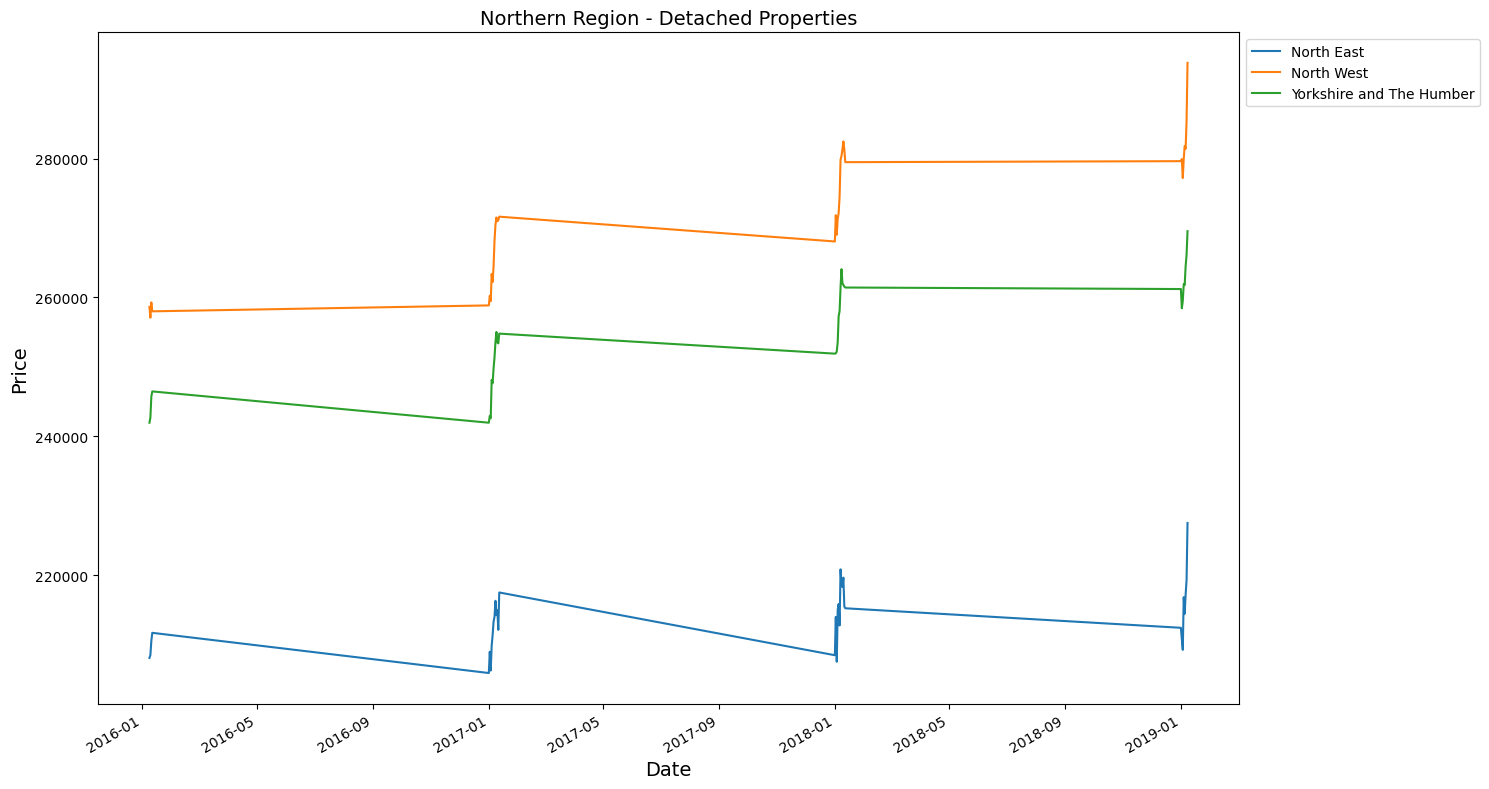

In [13]:
# Northern Region - Detached Properties
fig, ax = plt.subplots(figsize=(15, 8))
detached_northern.pivot(index='Date', columns='Area', values='Detached').plot(ax=ax)
ax.set_title('Northern Region - Detached Properties', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Code Explanation:**

This code segment visualises trends in detached property prices specifically for the Northern Region. This applies to all regions and also flat properties. We will not present a repeat explanaton for the code below. Here is a breakdown of the operations:

- **fig, ax = plt.subplots(figsize=(15, 8))**: Initiates a new subplot for the upcoming plot with specified dimensions.

- **detached_northern.pivot(index='Date', columns='Area', values='Detached').plot(ax=ax)**: Utilises the Pandas pivot function to organise the data, then plots the detached property prices over time for different areas in the Northern Region on the provided subplot.

- **ax.set_title('Northern Region - Detached Properties', fontsize=14)**: Sets the plot title to 'Northern Region - Detached Properties' with font size 14.

- **ax.set_ylabel('Price', fontsize=14)**: Sets the y-axis label to 'Price' with font size 14.

- **ax.set_xlabel('Date', fontsize=14)**: Sets the x-axis label to 'Date' with font size 14.

- **ax.legend(loc='upper left', bbox_to_anchor=(1, 1))**: Places the legend outside the plot area, specifically in the upper left corner, for better visualization.

- **plt.tight_layout()**: Adjusts the layout for better visualization.

- **plt.show()**: Displays the plot.


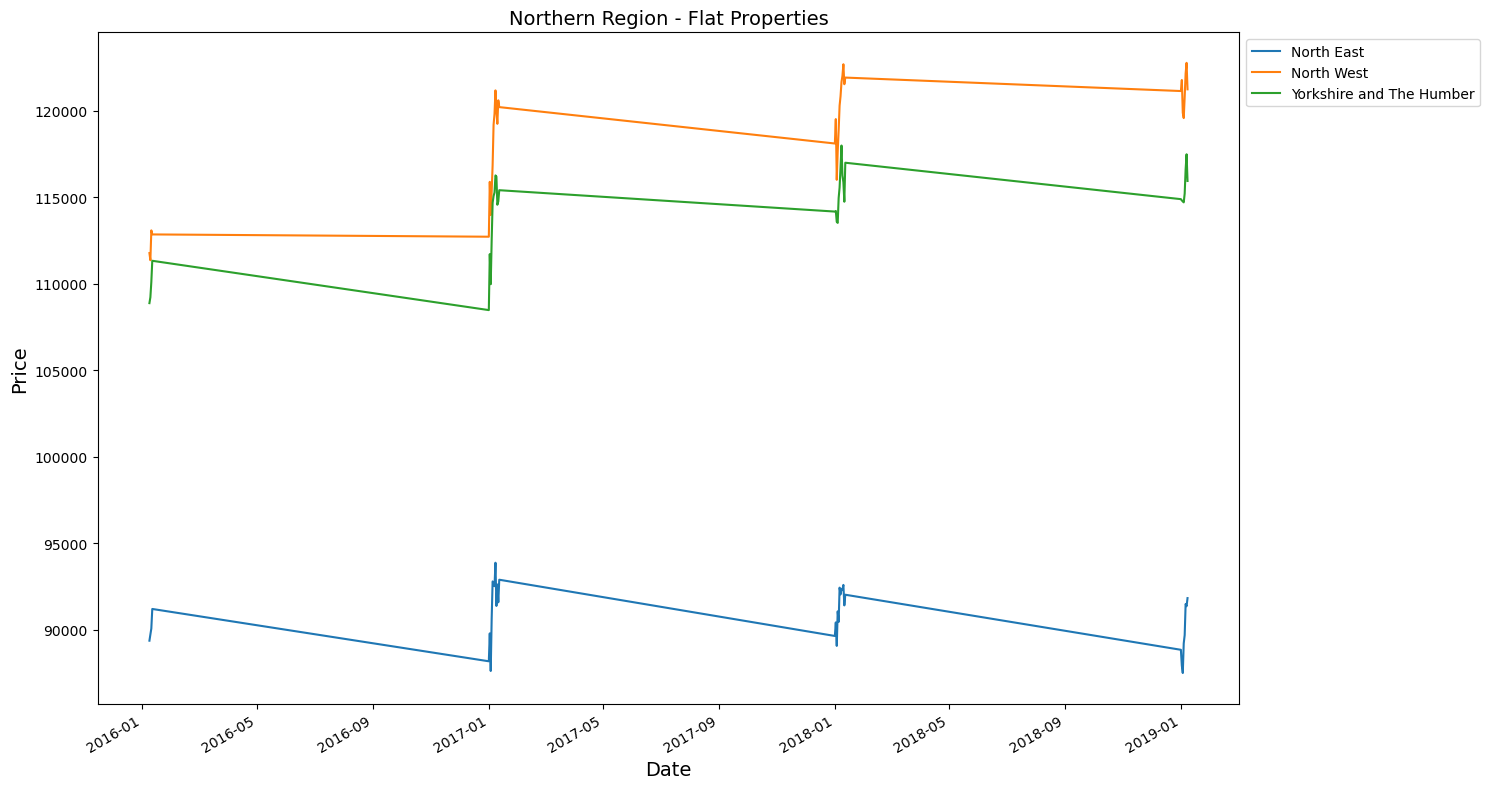

In [14]:
# Northern Region - Flat Properties
fig, ax = plt.subplots(figsize=(15, 8))
flat_northern.pivot(index='Date', columns='Area', values='Flat').plot(ax=ax)
ax.set_title('Northern Region - Flat Properties', fontsize=14)  
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

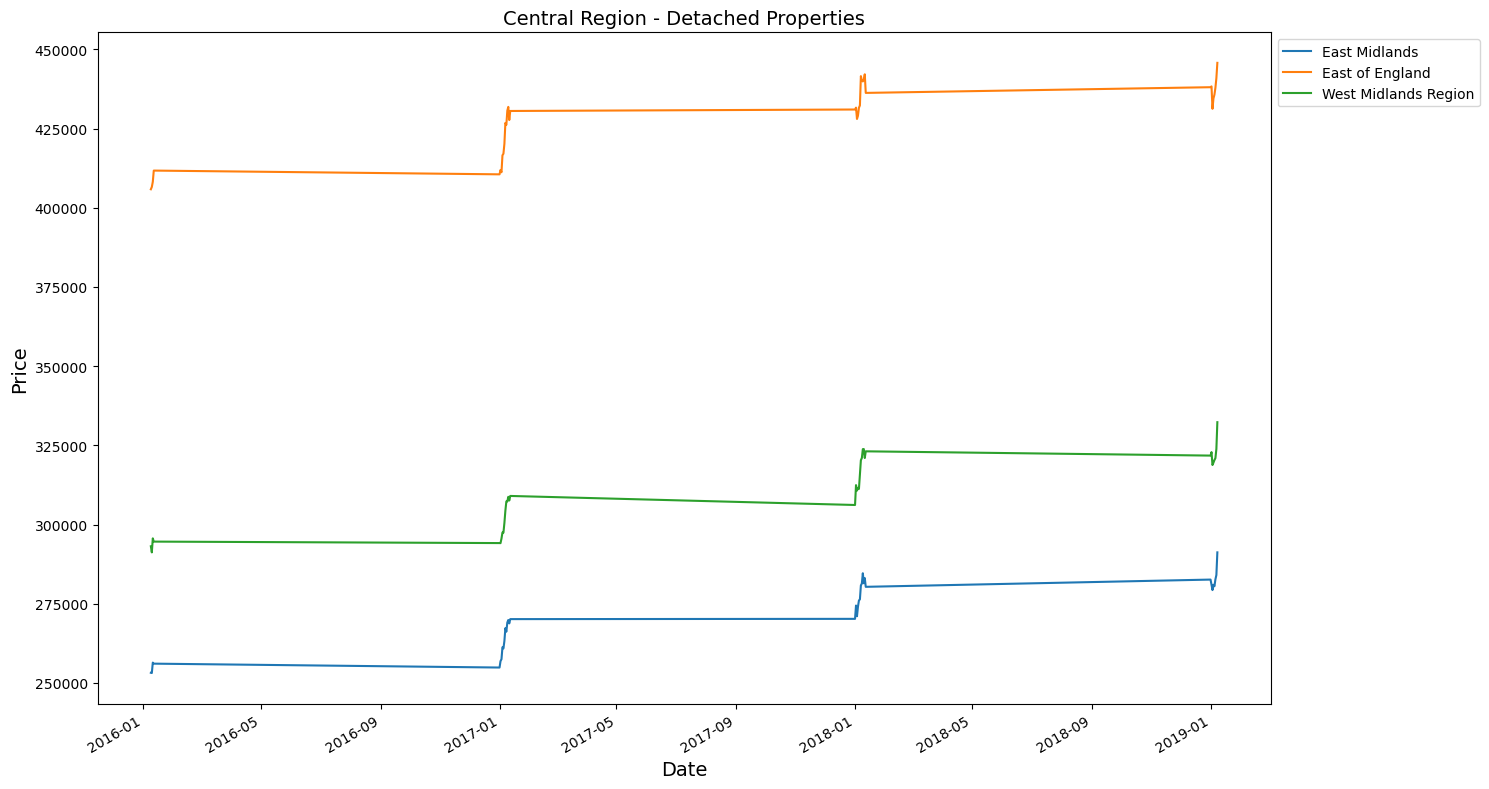

In [15]:
# Central Region - Detached Properties
fig, ax = plt.subplots(figsize=(15,8))
detached_central.pivot(index='Date', columns='Area', values='Detached').plot(ax=ax)
ax.set_title('Central Region - Detached Properties', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


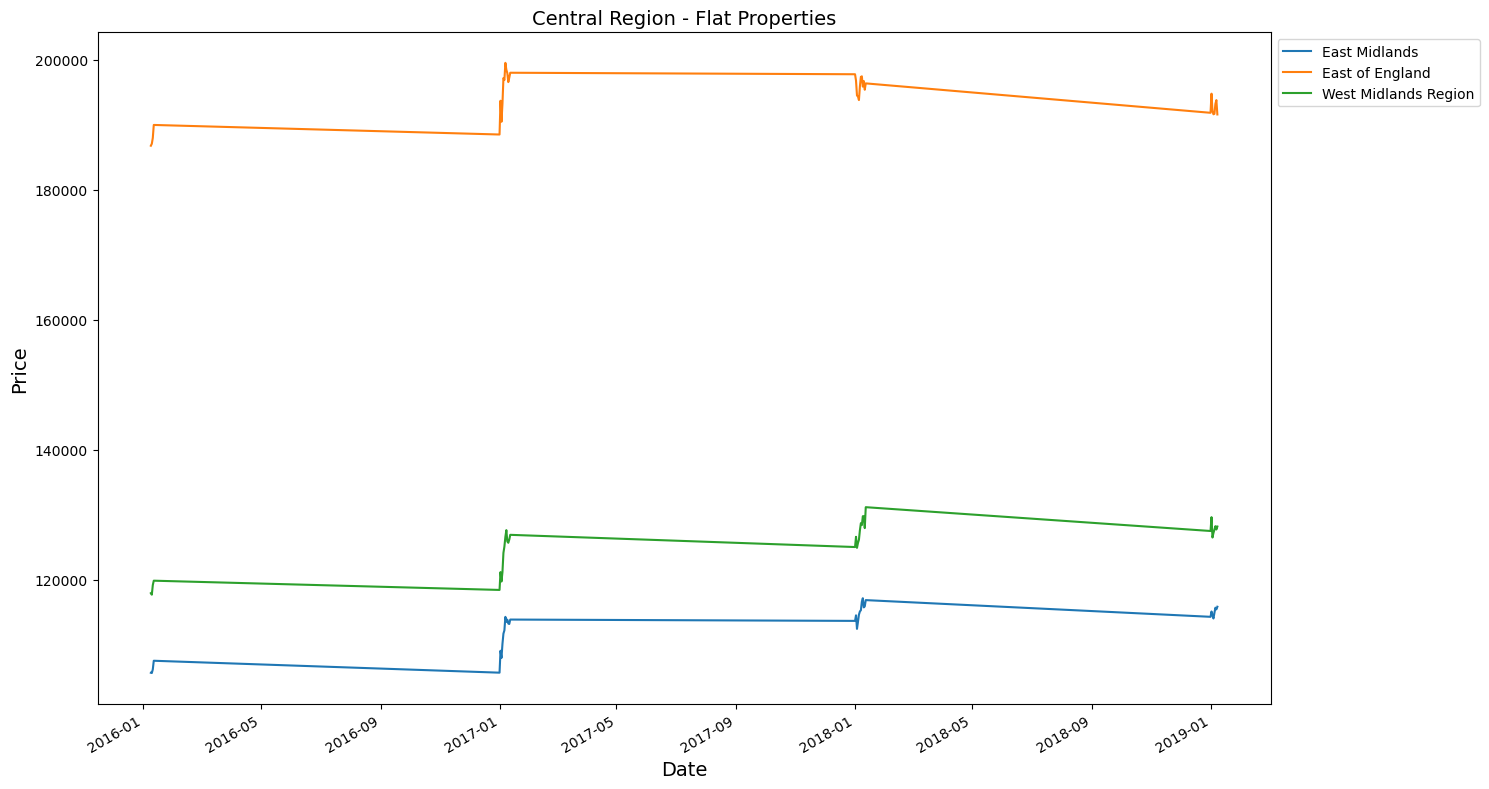

In [16]:
# Central Region - Flat Properties
fig, ax = plt.subplots(figsize=(15,8))
flat_central.pivot(index='Date', columns='Area', values='Flat').plot(ax=ax)
ax.set_title('Central Region - Flat Properties', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


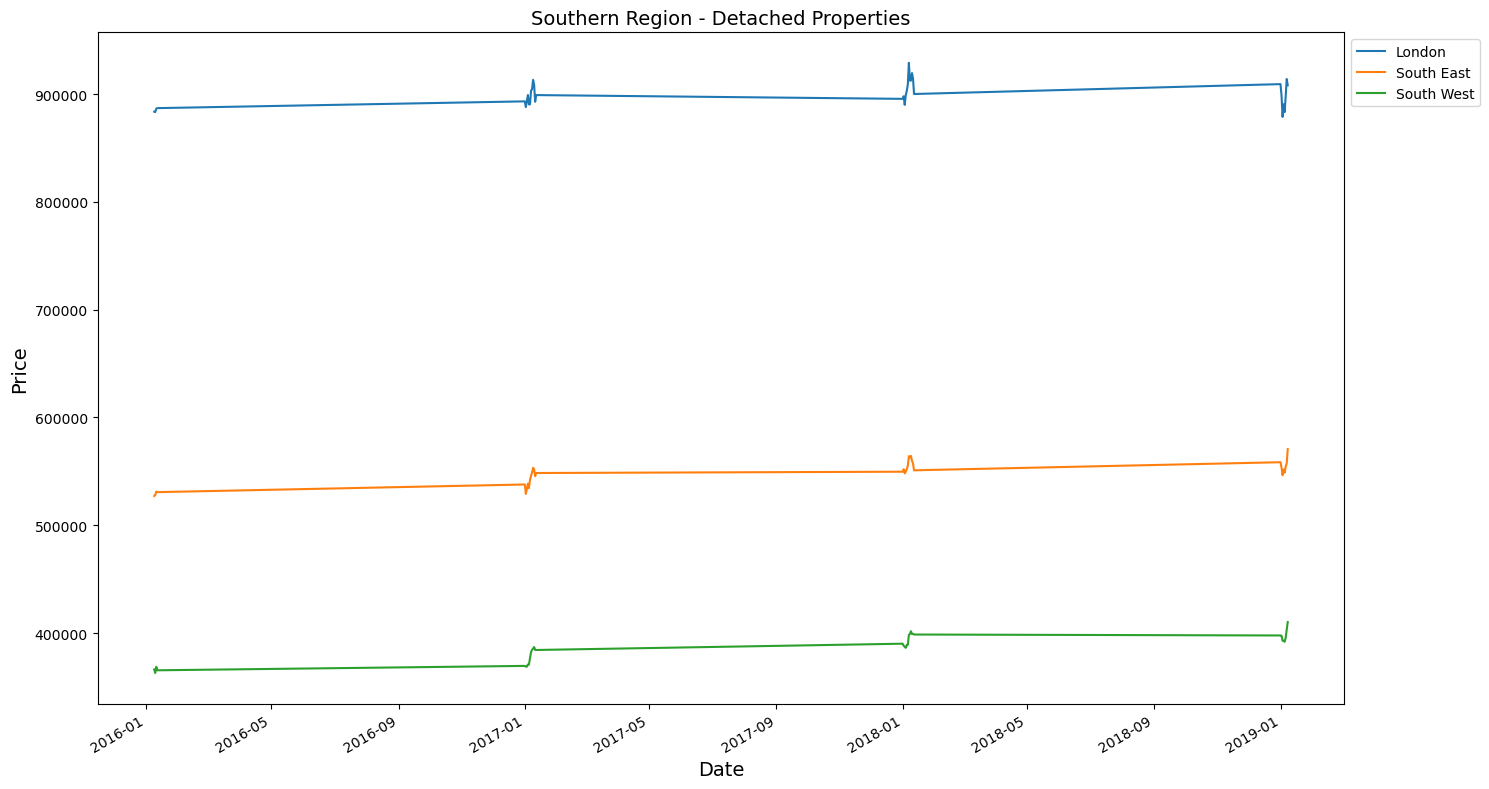

In [17]:
# Southern Region - Detached Properties
fig, ax = plt.subplots(figsize=(15,8))
detached_southern.pivot(index='Date', columns='Area', values='Detached').plot(ax=ax)
ax.set_title('Southern Region - Detached Properties', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


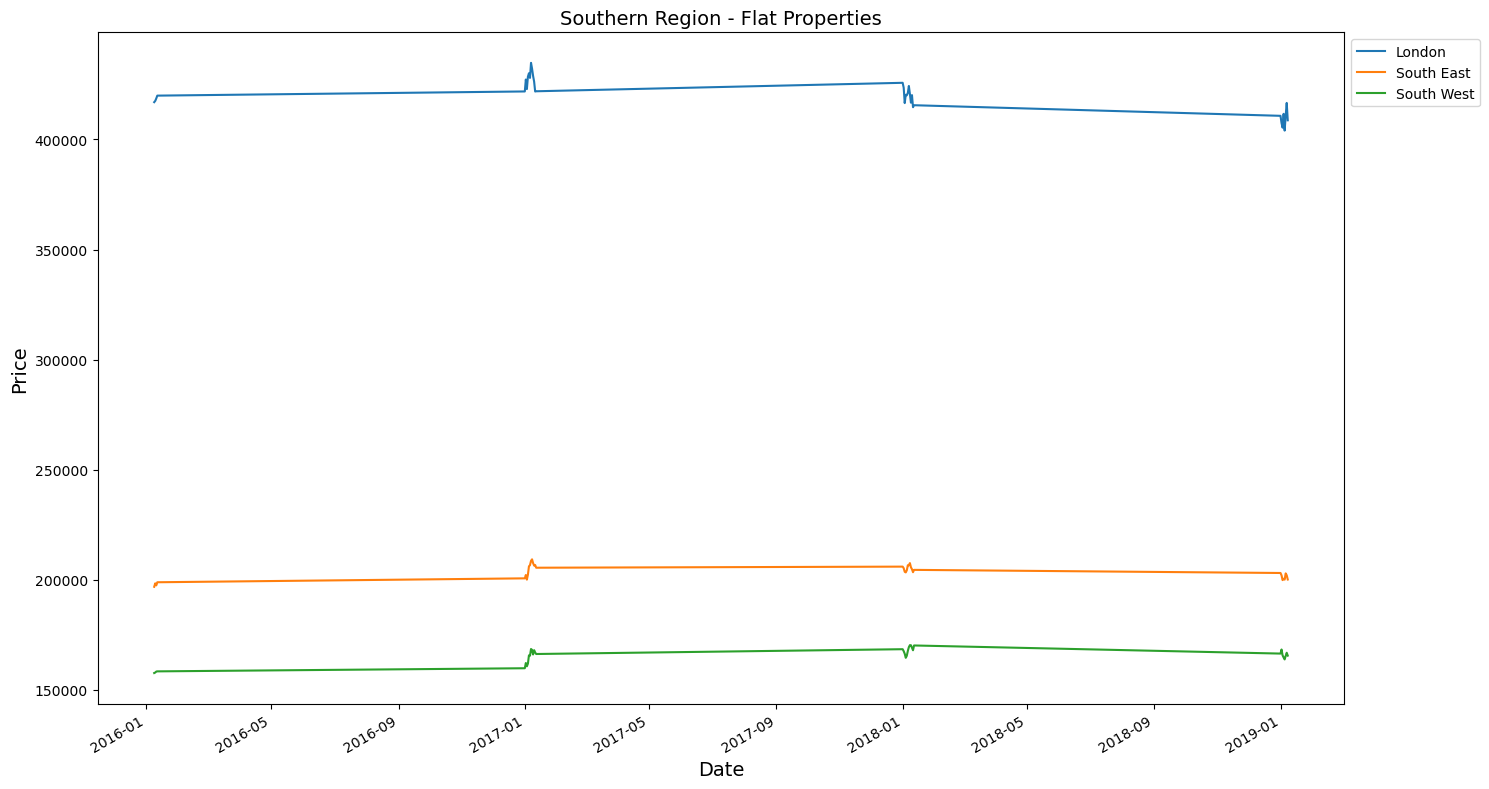

In [18]:
# Southern Region - Flat Properties
fig, ax = plt.subplots(figsize=(15,8))
flat_southern.pivot(index='Date', columns='Area', values='Flat').plot(ax=ax)
ax.set_title('Southern Region - Flat Properties', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


#### 2.1.2 Comparative Analysis 

Upon examining the property trends represented in the graphs for detached and flat properties, specific observations have been made across the Northern, Central, and Southern regions:

**Northern Region:**

Both detached and flat properties in the Northern region exhibit an overall annual upward price trend. This sustained growth can be attributed primarily to the steady increase in inflation rates, exerting upward pressure on property values. Notably, a marginal price reduction is observed during the year after the initial price increase. However, a distinctive surge in property values occurs at the year's end, indicating a recurring cyclical pattern. These phases of minor reductions followed by substantial price spikes may reflect seasonal or annual influences impacting the property market dynamics within the Northern region.

**Central Region:**

Similar price trends are visible for detached and flat properties in the Central region. In contrast to the northern regions, prices for detached and flat properties are more stable during the year. However, like the Northern region, a pronounced increase in property prices occurs at the year's end. A recurring cyclical trend also exists in the Central region's property market dynamics. 

**Southern Region:**

The distinct trend observed in the Southern region, covering areas such as London, the South East, and the South West, showcases a unique dynamic in property price trends. While there is a minimal and gradual annual increase in property prices, what stands out is the overall stability of the prices over the comparative period under analysis. This phenomenon diverges significantly from the consistent upward trajectory witnessed in other regions. The stabilisation of prices in the Southern region could be traced to various multifaceted factors. Limited housing supply (in areas such as central London), a pivotal contributor, increases demand, fostering a more stable pricing environment.

Moreover, the ever-evolving external influences, including regulatory changes and specific economic variations unique to this area, contribute to this distinct trend. Collectively, these factors create a relatively steady and linear pricing dynamic in the Southern region, setting it apart from the fluctuating patterns observed elsewhere.

### Section 2.2: Additional Plots - Descriptive Statistics and Analytical Insights

In this section, we delve into the numerical representation of our property price data through descriptive statistics. Additionally, we create insightful plots based on the computed data to further enhance our understanding of trends shown. 

In [19]:
print("Detached Northern Description:")
print(detached_northern.describe())
print("\nFlat Northern Description:")
print(flat_northern.describe())
print("\nDetached Central Description:")
print(detached_central.describe())
print("\nFlat Central Description:")
print(flat_central.describe())
print("\nDetached Southern Description:")
print(detached_southern.describe())
print("\nFlat Southern Description:")
print(flat_southern.describe())

Detached Northern Description:
            Detached
count     108.000000
mean   246878.784071
std     25681.336290
min    205942.709900
25%    216730.184200
50%    254201.785850
75%    266647.225500
max    293777.822800

Flat Northern Description:
                Flat
count     108.000000
mean   107948.380779
std     12552.226439
min     87491.328930
25%     92334.516200
50%    114388.075150
75%    117526.873725
max    122772.890100

Detached Central Description:
            Detached
count     108.000000
mean   336855.526549
std     67836.127557
min    253113.564400
25%    280980.557100
50%    310975.152650
75%    417855.873975
max    445761.228700

Flat Central Description:
                Flat
count     108.000000
mean   144228.853602
std     36053.634739
min    105677.910200
25%    115285.525025
50%    126565.404900
75%    191715.559150
max    199512.822700

Detached Southern Description:
            Detached
count     108.000000
mean   611320.000598
std    215531.611303
min    3629

**Code Explanation:**

This code generates summary statistical descriptions for detached and flat property prices in the Northern, Central, and Southern regions. The describe() function produces vital statistics, including mean, standard deviation, minimum, maximum, and quartiles. These summaries offer a quick overview of each region's distribution and central tendencies of property prices.

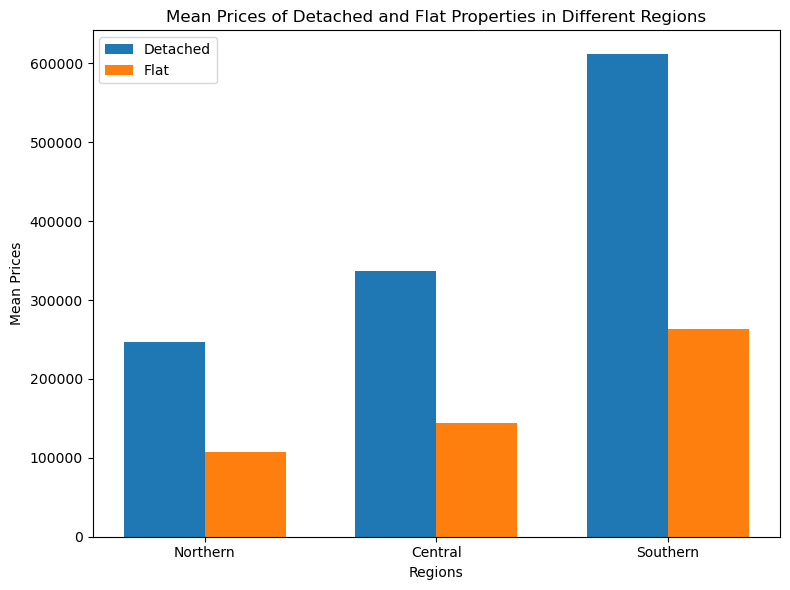

In [20]:
# Mean prices for detached and flat properties in different regions
mean_detached = [246878.78, 336855.53, 611320.00] 
mean_flat = [107948.38, 144228.85, 262842.86]  

regions = ['Northern', 'Central', 'Southern']

# Creating bar plot for mean prices
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = range(len(regions))

# Bar plot for detached properties
bar1 = plt.bar(index, mean_detached, bar_width, label='Detached')

# Bar plot for flat properties (shifted to the right for better visualisation)
bar2 = plt.bar([i + bar_width for i in index], mean_flat, bar_width, label='Flat')

# Adding labels and titles
plt.xlabel('Regions')
plt.ylabel('Mean Prices')
plt.title('Mean Prices of Detached and Flat Properties in Different Regions')

# Adjusting x-axis ticks
plt.xticks([i + bar_width/2 for i in index], regions)

# Adding legend
plt.legend()

# Adjusting layout for better visual appeal
plt.tight_layout()

# Display the plot
plt.show()

**Code Explanation:**

This code segment generates a bar plot illustrating the mean prices of detached and flat properties in different regions, namely Northern, Central, and Southern. Here is a breakdown of the operations:

- **plt.figure(figsize=(8, 6))**: Initiates a new figure for the upcoming bar plot with specified dimensions.

- **bar_width = 0.35**: Sets the width of each bar in the plot.

- **index = range(len(regions))**: Creates an index range based on the number of regions for positioning the bars.

- **bar1 = plt.bar(index, mean_detached, bar_width, label='Detached')**: Plots the bars representing mean prices for detached properties in each region.

- **bar2 = plt.bar([i + bar_width for i in index], mean_flat, bar_width, label='Flat')**: Plots the bars representing mean prices for flat properties, shifted to the right for better visualisation.

- **plt.xlabel('Regions')**: Adds a label to the x-axis indicating the regions.

- **plt.ylabel('Mean Prices')**: Adds a label to the y-axis indicating mean prices.

- **plt.title('Mean Prices of Detached and Flat Properties in Different Regions')**: Sets the title of the plot.

- **plt.xticks([i + bar_width/2 for i in index], regions)**: Adjusts the x-axis ticks to correspond to the regions.

- **plt.legend()**: Adds a legend to the plot to distinguish between detached and flat properties.

- **plt.tight_layout()**: Adjusts the layout for better visual appeal.

- **plt.show()**: Displays the plot.

This visualisation provides a comparative view of mean property prices across regions and property types.

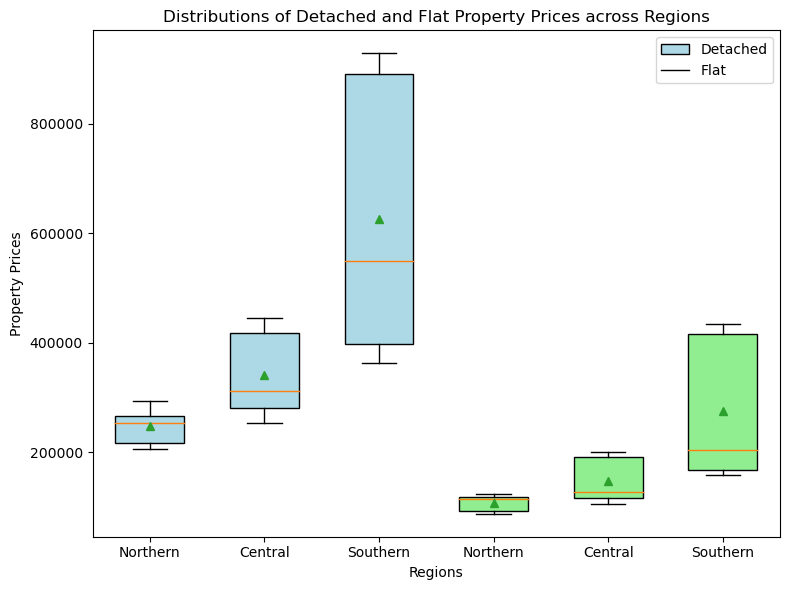

In [21]:
import matplotlib.pyplot as plt

# Prices data for detached and flat properties in different regions
detached_prices = [
    [205942.71, 216730.18, 254201.79, 266647.23, 293777.82],  # Northern
    [253113.56, 280980.56, 310975.15, 417855.87, 445761.23],  # Central
    [362947.15, 397711.96, 549694.29, 890457.33, 929010.96]   # Southern
]

flat_prices = [
    [87491.33, 92334.52, 114388.08, 117526.87, 122772.89],  # Northern
    [105677.91, 115285.53, 126565.40, 191715.56, 199512.82],  # Central
    [157517.68, 168004.45, 203424.75, 415819.48, 434837.04]  # Southern
]

regions = ['Northern', 'Central', 'Southern']

# Creating box plots for detached and flat property prices
plt.figure(figsize=(8, 6))

# Box plot for detached properties
plt.boxplot(detached_prices, positions=[1, 2, 3], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'), showmeans=True)

# Box plot for flat properties
plt.boxplot(flat_prices, positions=[4, 5, 6], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgreen'), showmeans=True)

plt.xlabel('Regions')
plt.ylabel('Property Prices')
plt.title('Distributions of Detached and Flat Property Prices across Regions')

# Setting x-axis ticks and labels
plt.xticks([2, 5], ['Detached', 'Flat'])
plt.xticks([1, 2, 3, 4, 5, 6], regions * 2)

# Adding legend
plt.legend(['Detached', 'Flat'])

# Adjusting layout for better visual appeal
plt.tight_layout()

# Display the plot
plt.show()


**Code Explanation:**

This code segment generates box plots illustrating the distributions of detached and flat property prices across different regions (Northern, Central, and Southern). Here is a brief overview of the shared operations with the previous code explanation:

- **plt.figure(figsize=(8, 6))**: Initiates a new figure for the upcoming box plots with specified dimensions.

- **...**: (Shared operations for box plots, including setting widths, patch colours, showing means, etc.)

- **plt.xlabel('Regions')**: Adds a label to the x-axis indicating the regions.

- **plt.ylabel('Property Prices')**: Adds a label to the y-axis indicating property prices.

- **plt.title('Distributions of Detached and Flat Property Prices across Regions')**: Sets the title of the plot.

- **plt.xticks([2, 5], ['Detached', 'Flat'])**: Adjusts x-axis ticks to correspond to property types.

- **plt.xticks([1, 2, 3, 4, 5, 6], regions * 2)**: Adjusts x-axis ticks and labels for better visualisation.

- **plt.legend(['Detached', 'Flat'])**: Adds a legend to the plot to distinguish between detached and flat properties.

- **plt.tight_layout()**: Adjusts the layout for better visual appeal.

- **plt.show()**: Displays the plot.

This visualisation provides a comparative view of the distribution of property prices across regions for detached and flat properties.

#### Section 2.2.1: Analysis of Trends in Mean, Median, and Range of Prices

The bar and box plots illustrate the mean, median, and range of prices for detached and flat properties across regions and reveal distinctive patterns:

**Detached Properties:**
- **Northern Region**: Displays the lowest mean and median price, indicating a relatively affordable average for detached properties. The range is comparatively smaller, suggesting a narrower spread of prices.
- **Central Region**: Presents a higher mean and median price than the Northern Region, with a moderate range, indicating a moderate spread of prices.
- **Southern Region**: Exhibits the highest mean and median price, suggesting a notable price difference among the regions. The range is considerably more extensive, indicating a wider spread of prices.

**Flat Properties:**
- **Northern Region**: Reflects the lowest mean and median price, consistent with the trend observed for detached properties. The range is comparatively smaller, suggesting a narrower spread of prices.
- **Central Region**: Shows a moderate mean and median price, aligning with the pattern observed in detached properties. The range is moderate, indicating a moderate spread of prices.
- **Southern Region**: Demonstrates the highest mean and median price, corresponding to the higher mean prices observed for detached properties. The range is considerably more extensive, indicating a wider spread of prices.

These observations highlight a trend where the Southern Region consistently features the highest mean and median prices for detached and flat properties. At the same time, the Northern Region tends to have the lowest mean and median prices, with a comparatively smaller range. This information is valuable for understanding regional property pricing disparities and market trends across different property types.

#### 2.3 Factors Influencing Property Price Trends in Different Regions

The observed trends in property prices across the Northern, Central, and Southern regions can be attributed to various factors:

1. **Economic Disparities:**
   - The Southern Region, particularly cities like London, is associated with a strong and diverse economy, potentially leading to higher property prices due to increased demand.
   - The Northern Region, encompassing areas like North East, North West, and Yorkshire, might experience comparatively lower economic growth, affecting property prices.

2. **Urbanisation and Population Density:**
   - Urbanised and densely populated cities in the Southern Region, such as London, often experience higher demand for housing, influencing property prices.
   - Northern regions, with lower population density and less urbanisation, may have lower housing demand, contributing to comparatively lower property prices.

3. **Job Opportunities:**
   - The availability of job opportunities in certain regions can impact property prices, with areas offering strong job markets attracting more residents and increasing demand for housing.
   - Southern regions, especially London, with diverse and abundant job opportunities, may witness higher property prices. 

4. **Infrastructure and Development:**
   - As access to amenities attracts homebuyers, regions with better infrastructure and ongoing development projects may experience higher property prices.
   - The level of infrastructure development can vary across regions, influencing property prices accordingly.

5. **Geographical Appeal:**
   - The geographical appeal of a region, such as proximity to natural attractions, can affect property prices, with coastal regions or scenic areas commanding higher prices.
   - Southern regions, including the Southwest, are known for picturesque landscapes, potentially contributing to higher property prices.

6. **Government Policies and Regulations:**
   - Government policies, including housing regulations and tax incentives, can impact property markets differently in each region.
   - Regional policies and regulations can contribute to variations in property prices.

Understanding these factors and conducting a more detailed analysis of each region's specific economic and demographic dynamics can provide a comprehensive explanation for the observed trends in property prices.

### Summary 

 The analysis in section 2 delved into the intricate patterns of property price trends across England's nine regions. This exploration focused on visualising these trends, focusing on flats and detached properties. Over 36 months, a series of plots are meticulously crafted to facilitate a nuanced comparison and comprehension of the variations. The examination extends to a comparative analysis, dissecting price fluctuations across regions, property types, and distinct periods within the designated timeframe. The objective is to draw meaningful comparisons between regions and property categories, unravelling the underlying dynamics. 

---

## Section 3: Dynamics of Flat Price Variations

This section focuses on unravelling the temporal evolution of flat prices within specific regions, honing in on the nuanced shifts between July 2017 and July 2018. Our primary objectives are:

1. **Quantify Price Changes:** Calculate and analyse the change in flat prices for each area during the specified months, providing a quantitative understanding of the variations.

2. **Visualise Regional Trends:** Employ effective visualisation methods to portray the change in flat prices across different areas within each region, facilitating a comprehensive view of regional trends.

3. **Identify Patterns:** Comment on the observed results, delving into any discernible patterns or anomalies in flat price changes, aiming to uncover valuable insights into the dynamic landscape of real estate within the selected regions.

By accomplishing these objectives, this analysis aspires to explore the temporal and spatial dynamics influencing flat prices comprehensively, ultimately enriching our understanding of the intricate real estate landscape.

### Section 3.1 Quantify Price Changes

In [22]:
# Convert the 'Date' column to datetime format
enhanced_area_data['Date'] = pd.to_datetime(enhanced_area_data['Date'], dayfirst=True)

# Extract relevant columns for analysis
filtered_data = enhanced_area_data[['Date', 'Area', 'Code', 'Flat', 'RegionCode', 'RegionName']]

# Filter data for July 2017 and July 2018
july_2017_data = filtered_data[filtered_data['Date'] == '2017-07-01']
july_2018_data = filtered_data[filtered_data['Date'] == '2018-07-01']

**Code Explanation:**

This code segment focuses on preparing the data for further analysis:

- **pd.to_datetime(enhanced_area_data['Date'], dayfirst=True)**: Converts the 'Date' column in the 'enhanced_area_data' DataFrame to the datetime format. The `dayfirst=True` parameter handles the UK 'day first' date format.

- **enhanced_area_data[['Date', 'Area', 'Code', 'Flat', 'RegionCode', 'RegionName']]**: Selects relevant columns ('Date', 'Area', 'Code', 'Flat', 'RegionCode', 'RegionName') from the 'enhanced_area_data' DataFrame.

- **filtered_data[filtered_data['Date'] == '2017-07-01']**: Filters the data to include only entries from July 2017 ('2017-07-01') in the 'filtered_data' DataFrame.

- **filtered_data[filtered_data['Date'] == '2018-07-01']**: Filters the data to include only entries from July 2018 ('2018-07-01') in the 'filtered_data' DataFrame.

These operations aim to isolate data for specific time points (July 2017 and July 2018) and relevant columns, creating subsets for further analysis of flat prices.

In [23]:
# Merge the data on 'Area'
merged_data = pd.merge(july_2017_data, july_2018_data, on=['Area','RegionName', 'Code', 'RegionCode'], suffixes=('_2017', '_2018'))

# Calculate the price change for flats
merged_data['Flat_Price_Change'] = merged_data['Flat_2018'] - merged_data['Flat_2017']

# Display the result
print('Flat Price Changes:')
print(merged_data[['Area', 'Flat_Price_Change']])

Flat Price Changes:
                     Area  Flat_Price_Change
0              Hartlepool        -3891.02012
1           Middlesbrough          150.83825
2    Redcar and Cleveland         -705.01266
3        Stockton-on-Tees           55.22466
4              Darlington        -3362.06155
..                    ...                ...
136               Suffolk         2210.28110
137                Surrey        -2971.83510
138          Warwickshire         1793.77060
139           West Sussex        -1711.65960
140        Worcestershire           -6.98490

[141 rows x 2 columns]


**Code Explanation:**

This code section involves merging data from July 2017 and July 2018 based on common columns ('Area', 'RegionName', 'Code', 'RegionCode') using the `pd.merge` function. The resulting DataFrame, named 'merged_data,' contains information from both time points, with column suffixes '_2017' and '_2018' to distinguish between the two years.

- **pd.merge(july_2017_data, july_2018_data, on=['Area','RegionName', 'Code', 'RegionCode'], suffixes=('_2017', '_2018'))**: Merges the data from July 2017 ('july_2017_data') and July 2018 ('july_2018_data') based on standard columns ('Area', 'RegionName', 'Code', 'RegionCode'). The resulting DataFrame is labelled'merged_data,' and columns from each year are suffixed for clarity.

- **merged_data['Flat_Price_Change'] = merged_data['Flat_2018'] - merged_data['Flat_2017']**: Calculates the change in flat prices ('Flat_Price_Change') by subtracting the flat prices in 2017 ('Flat_2017') from those in 2018 ('Flat_2018').

- **print('Flat Price Changes:')**: Displays a heading indicating the subsequent output will show changes in flat prices.

- **print(merged_data[['Area', 'Flat_Price_Change']])**: Prints a subset of 'merged_data' containing the 'Area' and 'Flat_Price_Change' columns, providing a summary of the changes in flat prices for each area.

### Section 3.2 Visualise Regional Trends

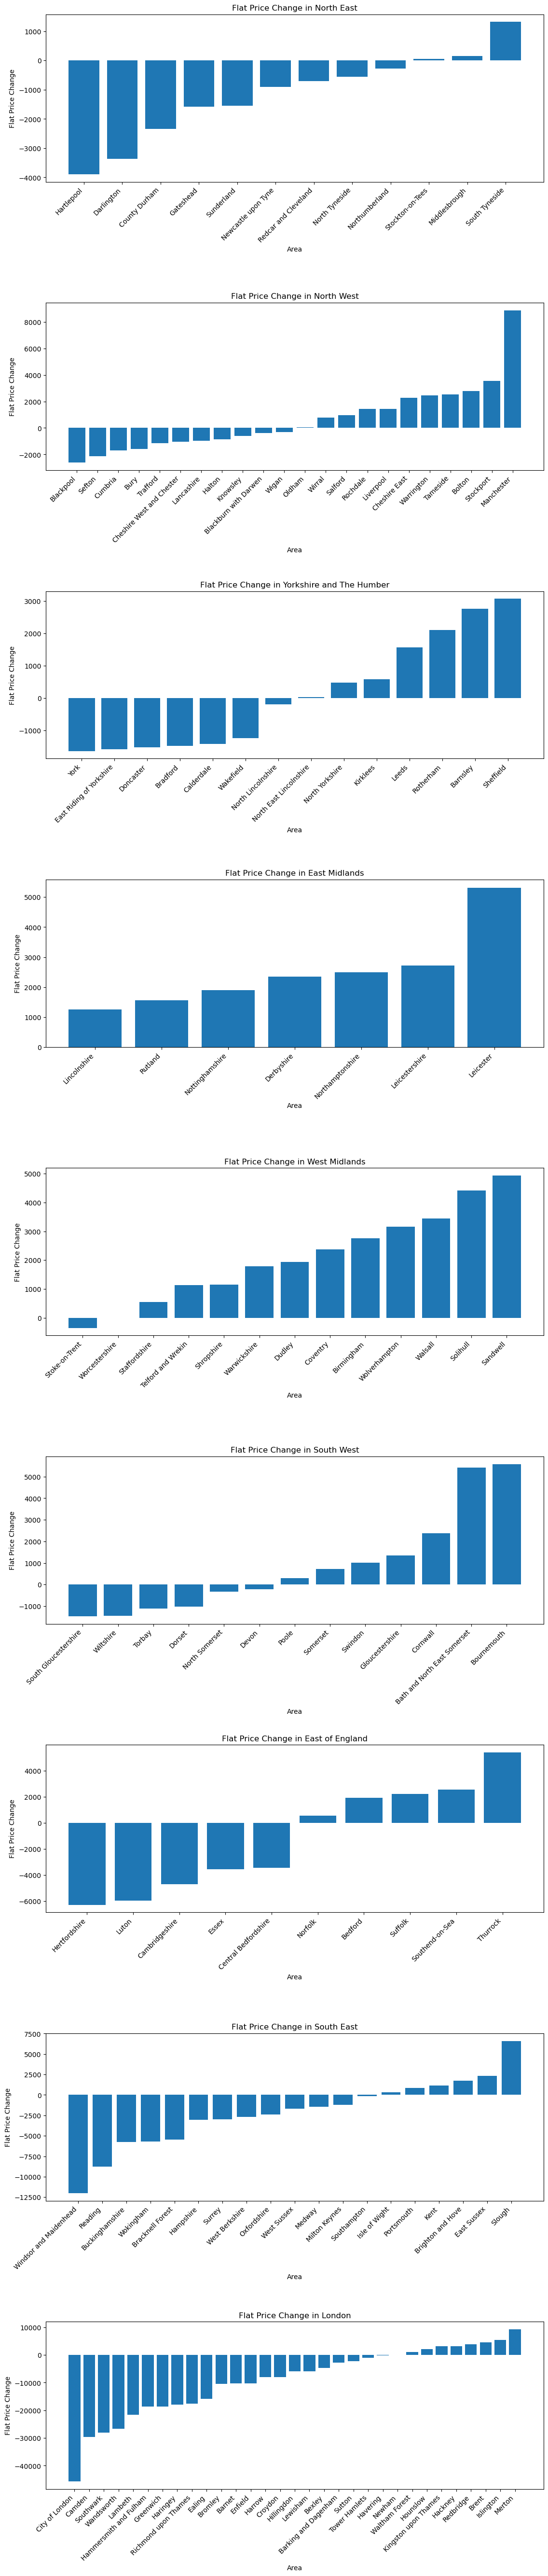

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame

# Group by region and iterate through the groups
unique_regions = merged_data['RegionName'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=len(unique_regions), figsize=(12, 6 * len(unique_regions)))

for i, region in enumerate(unique_regions):
    data = merged_data[merged_data['RegionName'] == region]
    
    # Sort the data based on 'Flat_Price_Change' column in ascending order
    data = data.sort_values(by='Flat_Price_Change')
    
    x_values = range(len(data['Area']))
    
    axes[i].bar(x_values, data['Flat_Price_Change'])
    axes[i].set_title(f'Flat Price Change in {region}')
    axes[i].set_xlabel('Area')
    axes[i].set_ylabel('Flat Price Change')
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(data['Area'], rotation=45, ha='right')  # Adjust rotation and alignment

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()

**Code Explanation:**

This code segment uses Matplotlib to create a grouped bar chart that visualises flat price changes in different regions. Here is a breakdown of the operations:

- **unique_regions = merged_data['RegionName'].unique()**: Identifies the unique regions in the 'RegionName' column of the 'merged_data' DataFrame.

- **fig, axes = plt.subplots(nrows=len(unique_regions), figsize=(12, 6 * len(unique_regions)))**: Initialisessubplots based on the number of unique regions, adjusting the figure size accordingly.

- **for i, region in enumerate(unique_regions)**: Iterates through each unique region, creating a separate bar chart for flat price changes.

- **data = merged_data[merged_data['RegionName'] == region]**: Filters 'merged_data' to include only rows corresponding to the current region.

- **data = data.sort_values(by='Flat_Price_Change')**: Sorts the filtered data based on the 'Flat_Price_Change' column in ascending order.

- **x_values = range(len(data['Area']))**: Generates x-axis values based on the number of areas in the region.

- **axes[i].bar(x_values, data['Flat_Price_Change'])**: Plots a bar chart for flat price changes for each area in the current region.

- **axes[i].set_title(f'Flat Price Change in {region}')**: Sets the title of the subplot to indicate the region being visualised.

- **axes[i].set_xlabel('Area')** and **axes[i].set_ylabel('Flat Price Change')**: Sets labels for the x-axis and y-axis, respectively.

- **axes[i].set_xticks(x_values)** and **axes[i].set_xticklabels(data['Area'], rotation=45, ha='right')**: Configures x-axis tick positions and labels, adjusting for better readability.

- **plt.tight_layout(pad=3.0)**: Adjusts the layout for better spacing between subplots.

- **plt.show()**: Displays the grouped bar chart.

### Section 3.3: Identifying Patterns

Careful examination of the dynamics of flat prices reveals unique patterns ingrained in the local environments. 

Among these, the East Midlands is particularly noteworthy as it represents a single pattern in which average flat prices are rising in all areas. This extraordinary consistency highlights the resilience of the East Midlands property market, as flat prices have remained the same in all areas. 

Furthermore, notable instances of equilibrium can be found in the North West, Yorkshire and the Humber, and the East of England. These areas represent a harmonic interaction between market forces and subtle stability by balancing the increases and decreases in flat pricing.


Moreover, London's skyline, which is well-known for its skyrocketing and seemingly endless real estate prices, is unexpected. There are noticeable regions in London where flat prices have fallen, defying the widespread belief that expansion is unchecked. This fascinating observation calls for more investigation into the complex processes influencing the real estate market in this significant city.

By providing significant insights into the varied and complex real estate dynamics across locations, this thorough study of patterns in flat price variations sheds light on the several reasons impacting these changes.


### Summary

Section 3 delved into the dynamic landscape of flat price variations within specific regions, focusing on the transformative period between July 2017 and July 2018. We successfully quantified the changes in flat prices for each area through a meticulous quantitative analysis, providing a numerical foundation for our exploration. Leveraging effective visualisation techniques, we brought to light the regional trends, offering a comprehensive view of the nuanced shifts in flat prices across diverse areas within each region. The commentary interpreted the observed results and aimed to uncover any discernible patterns or anomalies, adding valuable insights to our understanding of the ever-evolving real estate dynamics within the selected regions.

---

## Section 4: Statistical Analysis

In this section, we embark on a rigorous statistical analysis using the `merged_data` dataset, seeking to discern meaningful patterns and ascertain the presence of consistent impacts on flat prices across diverse regions. The overarching objective is to employ statistical methods to gain deeper insights into the variations and associations inherent in our data.

### Objectives:

1. **Cross-tabulate Price Changes by Region:**
   - Generate a comprehensive cross-tabulation, meticulously detailing the number of areas within each region where flat prices have either increased or decreased. This objective aims to provide a granular view of the distribution of price changes across different geographical areas.

2. **Chi-Square Test for Regional Differences:**
   - Utilize the chi-square test, specifically the G-test statistic, to rigorously assess whether there exists compelling evidence suggesting variations in flat price changes among the regions. This statistical approach identifies whether the observed differences are statistically significant or merely random fluctuations.

3. **Interpretation of Results:**
   - Thoroughly interpret the outcomes of the chi-square test, elucidating the implications of the results. This includes discussing any significant evidence for regional disparities in flat price changes and understanding the limitations of what the statistical analysis can and cannot determine.

Through these objectives, we strive to uncover more profound insights into the spatial dynamics of flat price variations, employing statistical rigour to draw meaningful conclusions about the consistency of these variations across different regions.


### 4.1 Cross-tabulate Price Changes by Region

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a new column indicating whether the price change is positive, negative, or zero
merged_data['Price_Change_Category'] = pd.cut(merged_data['Flat_Price_Change'], bins=[float('-inf'), 0, float('inf')], labels=['Decrease', 'Increase'])

# Cross-tabulate the number of areas by region and price change category
cross_table = pd.crosstab(index=merged_data['RegionName'], columns=merged_data['Price_Change_Category'])

# Display the cross-tabulation
print(cross_table)

Price_Change_Category     Decrease  Increase
RegionName                                  
East Midlands                    0         7
East of England                  5         5
London                          22         9
North East                       9         3
North West                      11        11
South East                      13         6
South West                       6         7
West Midlands                    2        11
Yorkshire and The Humber         7         7


**Code Explanation:**

This code conducts a cross-tabulation analysis to explore the relationship between the regions and the categories of flat price changes (Decrease or Increase). Here is a breakdown of the operations:

- **merged_data['Price_Change_Category'] = pd.cut(merged_data['Flat_Price_Change'], bins=[float('-inf'), 0, float('inf')], labels=['Decrease', 'Increase'])**: Creates a new categorical column, 'Price_Change_Category,' classifying flat price changes as either Decrease or Increase based on predefined bins.

- **pd.crosstab(index=merged_data['RegionName'], columns=merged_data['Price_Change_Category'])**: Utilises Pandas' crosstab function to create a contingency table, cross-tabulating the count of areas by both region and price change category.

- **print(cross_table)**: Displays the resulting cross-tabulation, showcasing the distribution of areas across regions and the corresponding flat price change categories.

### 4.2 Chi-Square Test for Regional Differences:

A key component of our investigation involves the application of the G-test (likelihood ratio test) using the chi-square test for independence. This specific test allows us to assess whether the observed differences in price changes among regions are statistically significant.

In [26]:
# G-test (likelihood ratio test)
chi2, p, _, _ = chi2_contingency(cross_table, lambda_="log-likelihood")

# Print the results
print(f"G-test (likelihood ratio) value: {chi2}")
print(f"P-value: {p}")

# Interpret the results based on the p-value
if p < 0.05:
    print("There is evidence of a significant difference in price changes among regions.")
else:
    print("There is no significant difference in price changes among regions.")

G-test (likelihood ratio) value: 27.46965525780807
P-value: 0.0005863428164272518
There is evidence of a significant difference in price changes among regions.


**Code Explanation:**

This code segment performs a G-test, the likelihood ratio test, to assess the association between the regions and the categories of flat price changes. Here is an overview of the operations:

- **chi2, p, _, _ = chi2_contingency(cross_table, lambda_="log-likelihood")**: Applies the chi-square test for independence (G-test) to the contingency table generated earlier, with the specified log-likelihood method.

- **print(f"G-test (likelihood ratio) value: {chi2}")**: Displays the computed G-test (likelihood ratio) value.

- **print(f"P-value: {p}")**: Prints the associated p-value from the test.

- **if p < 0.05: print("There is evidence of a significant difference in price changes among regions.") else: print("There is no significant difference in price changes among regions.")**: Interprets the results based on the p-value. If the p-value is less than 0.05, it suggests evidence of a significant difference in price changes among regions; otherwise, it concludes that there is no significant difference.

### 4.3 Interpretation and Limitations

The G-test statistic, with a value of 27.47, measures the difference between the observed and expected frequencies in the contingency table. A higher G-test value indicates a more significant discrepancy between the observed and expected values. The p-value, at 0.000586, represents the probability of observing a G-test statistic as extreme as the calculated one, assuming no association between the variables (regions and price changes). The small p-value, less than 0.05, suggests that the observed differences in price changes among areas are unlikely to be due to random chance.

**Conclusion:**

The statistical evidence derived from the G-test indicates a significant difference in price changes among regions. This suggests that the distribution of price changes across areas is not likely the result of random variability alone. There is some association or difference that is statistically significant.

**Limitations:**

While the statistical results are significant, it's important to note the limitations of the analysis. The statistical significance does not imply causation, and further investigation is needed to understand the reasons behind the observed differences. The test only assesses the association between the variables considered (regions and price changes) and does not account for other potential factors that might influence price changes. Additionally, the interpretation assumes that the sample size is sufficiently large for the chi-square distribution to approximate the distribution of the test statistic; smaller sample sizes may yield less reliable results.

In summary, the statistical evidence supports the claim that there is a significant difference in price changes among regions. However, a comprehensive understanding of the underlying factors requires further investigation and consideration of additional variables.

### Summary 

Section 4 delved into a meticulous statistical analysis of flat prices across diverse regions using the merged_data dataset. Key objectives included a detailed cross-tabulation of price changes by region, the application of the chi-square test to identify regional differences, and a thorough interpretation of the results. This statistical exploration aimed to uncover consistent influences on flat prices and provide meaningful insights into spatial dynamics across regions.

---

## Conclusion

As we conclude our exploration into the trends and patterns of average property prices, the journey has been both enlightening and insightful. The meticulous process of preparing the dataset in Section 1 laid a robust foundation, ensuring that our subsequent analyses are anchored in comprehensive and enriched information.

The subsequent sections unfolded a narrative of property price dynamics across different regions and property types, providing a nuanced understanding of the real estate landscape in England. From plotting trends, dissecting the variations in flat prices and engaging in rigorous statistical analysis, each section contributed a unique perspective to our exploration.

Through this analytical journey, we have uncovered trends and patterns and sought to understand the driving forces behind these fluctuations. The contextual significance of this analysis extends beyond mere observation; it holds the potential to inform strategic decisions in real estate, guide investment choices, and contribute to a broader comprehension of economic dynamics influenced by property markets.

In essence, this report serves as a valuable resource for stakeholders in the real estate domain, offering a data-driven narrative that can guide decision-makers, investors, and researchers in navigating the intricate landscape of property prices. As the real estate market continues to evolve, armed with insights from this analysis, we are better equipped to navigate the trends and patterns that shape this dynamic sector.

The journey into understanding average property prices in England may conclude here, but the insights gained resonate as a lasting contribution to the ongoing dialogue surrounding real estate dynamics.

---